##### Colab

In [1]:
# Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install -q kaggle

In [3]:
from google.colab import userdata
import os

os.environ["kaggle_key"] = userdata.get('kaggle_key')
os.environ["kaggle_username"] = userdata.get('kaggle_username')

In [ ]:
!kaggle datasets download -d ravidussilva/real-ai-art
! unzip "real-ai-art"

##### Local & Colab

In [6]:
#Imports
import sys

# Load environment variables from .env file
from dotenv import load_dotenv
load_dotenv()

# Get the project root path from environment variables
project_root = os.getenv('PROJECT_ROOT_PATH') #OR PROJECT_ROOT_PATH_COLAB FOR COLAB

# Check if the environment variable is set correctly
if project_root is None:
    raise ValueError("PROJECT_ROOT_PATH environment variable is not set.")

# Add the project root path to the system path
sys.path.append(project_root)


from scripts.run_cnn import train_model, test_model

from models.simple_cnn import Simple_CNN
from scripts.evaluation import analyze_test_results
import torchvision.transforms as transforms

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [7]:
#dataset_path = "/Users/viktoriiaovsianik/Documents/Uni/04_WS2024/06_ADL/Code/ADL-WS-2024/data"
dataset_path = "/content/Real_AI_SD_LD_Dataset"

#### Train & test baseline (Simple CNN)

In [9]:
# Define transformations

train_transform = transforms.Compose([
        transforms.Resize(size=(32, 32)),
        transforms.ToTensor()
    ])

val_transform = transforms.Compose([
        transforms.Resize(size=(32, 32)),
        transforms.ToTensor()
    ])

test_transform = transforms.Compose([
        transforms.Resize(size=(32, 32)),
        transforms.ToTensor()
    ])


# Config for training and testing
config = {
    'model': Simple_CNN(),
    'dataset_path': dataset_path,
    'model_save_dir': 'saved_models',
    'results_save_dir': 'saved_results',
    'train_transform': train_transform,
    'val_transform': val_transform,
    'test_transform': test_transform,
    'batch_size': 64,
    'learning_rate': 0.001,
    'scheduler_gamma': 0.9,
    'epochs': 10,
    'fraction': 1,
    'val_frequency': 1,
    'debug_mode': True,
    'patience': 3,
    'model_name': "Simple_CNN"
}

# Train the model

trainer = train_model(config)

CUDA (GPU) is available.
Preprocessing dataset...
Train dataset length: 90000
Validation dataset length: 10000
Test dataset length: 30000
Model: Simple_CNN(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc): Linear(in_features=1024, out_features=20, bias=True)
)


wandb: Currently logged in as: ovsvc (ovsvc-tu-wien). Use `wandb login --relogin` to force relogin


Training with batch size: 64
Epoch 0/10:
--- Training epoch 0 ---


Train:   0%|          | 1/1407 [00:01<44:54,  1.92s/it]

Batch 0, Loss: 2.9982454776763916


Train:  36%|███▌      | 501/1407 [03:10<05:36,  2.70it/s]

Batch 500, Loss: 2.8983864784240723


Train:  71%|███████   | 1001/1407 [06:25<02:25,  2.80it/s]

Batch 1000, Loss: 2.658828020095825


Train: 100%|██████████| 1407/1407 [08:52<00:00,  2.64it/s]


Epoch 0 Training Loss: 2.807112818230523
Training Metrics: Overall Accuracy: 0.1382
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.06
Accuracy for class AI_surrealism: 0.31
Accuracy for class human_art_nouveau: 0.27
Accuracy for class human_expressionism: 0.21
Accuracy for class human_ukiyo_e: 0.11
Accuracy for class AI_renaissance: 0.01
Accuracy for class AI_art_nouveau: 0.32
Accuracy for class human_realism: 0.10
Accuracy for class AI_realism: 0.12
Accuracy for class human_post_impressionism: 0.23
Accuracy for class human_romanticism: 0.20
Accuracy for class AI_expressionism: 0.02
Accuracy for class AI_baroque: 0.01
Accuracy for class AI_impressionism: 0.04
Accuracy for class human_surrealism: 0.01
Accuracy for class human_renaissance: 0.01
Accuracy for class AI_post_impressionism: 0.03
Accuracy for class AI_ukiyo-e: 0.07
Accuracy for class human_impressionism: 0.02
Accuracy for class AI_romanticism: 0.63
--- Validating epoch 0 ---


Evaluate:   1%|          | 1/157 [00:00<01:06,  2.35it/s]

Batch 0, Validation Loss: 2.6896748542785645


Evaluate: 100%|██████████| 157/157 [00:56<00:00,  2.78it/s]


Epoch 0 Validation Loss: 2.5639112602233887
Validation Metrics: Overall Accuracy: 0.2191
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.12
Accuracy for class AI_ukiyo-e: 0.59
Accuracy for class AI_romanticism: 0.59
Accuracy for class AI_art_nouveau: 0.25
Accuracy for class human_surrealism: 0.27
Accuracy for class AI_renaissance: 0.01
Accuracy for class AI_realism: 0.33
Accuracy for class human_ukiyo_e: 0.17
Accuracy for class human_art_nouveau: 0.22
Accuracy for class AI_post_impressionism: 0.57
Accuracy for class human_baroque: 0.14
Accuracy for class human_impressionism: 0.03
Accuracy for class AI_impressionism: 0.05
Accuracy for class human_renaissance: 0.01
Accuracy for class human_expressionism: 0.07
Accuracy for class human_realism: 0.03
Accuracy for class AI_baroque: 0.06
Accuracy for class human_post_impressionism: 0.09
Accuracy for class AI_surrealism: 0.09
Accuracy for class AI_expressionism: 0.69
#### Best accuracy 0.2191 at epoch 0
#### Saving model to saved_

Train:   0%|          | 1/1407 [00:00<09:39,  2.43it/s]

Batch 0, Loss: 2.5167274475097656


Train:  36%|███▌      | 501/1407 [02:46<05:35,  2.70it/s]

Batch 500, Loss: 2.526512622833252


Train:  71%|███████   | 1001/1407 [05:38<02:35,  2.61it/s]

Batch 1000, Loss: 2.212651252746582


Train: 100%|██████████| 1407/1407 [08:09<00:00,  2.88it/s]


Epoch 1 Training Loss: 2.4434480694452922
Training Metrics: Overall Accuracy: 0.2536
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.21
Accuracy for class AI_surrealism: 0.47
Accuracy for class human_art_nouveau: 0.51
Accuracy for class human_expressionism: 0.31
Accuracy for class human_ukiyo_e: 0.22
Accuracy for class AI_renaissance: 0.07
Accuracy for class AI_art_nouveau: 0.44
Accuracy for class human_realism: 0.33
Accuracy for class AI_realism: 0.31
Accuracy for class human_post_impressionism: 0.71
Accuracy for class human_romanticism: 0.19
Accuracy for class AI_expressionism: 0.16
Accuracy for class AI_baroque: 0.03
Accuracy for class AI_impressionism: 0.08
Accuracy for class human_surrealism: 0.05
Accuracy for class human_renaissance: 0.05
Accuracy for class AI_post_impressionism: 0.05
Accuracy for class AI_ukiyo-e: 0.14
Accuracy for class human_impressionism: 0.07
Accuracy for class AI_romanticism: 0.68
--- Validating epoch 1 ---


Evaluate:   1%|          | 1/157 [00:00<01:04,  2.43it/s]

Batch 0, Validation Loss: 2.2634177207946777


Evaluate: 100%|██████████| 157/157 [01:01<00:00,  2.57it/s]


Epoch 1 Validation Loss: 2.2956590255737304
Validation Metrics: Overall Accuracy: 0.2948
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.32
Accuracy for class AI_ukiyo-e: 0.36
Accuracy for class AI_romanticism: 0.54
Accuracy for class AI_art_nouveau: 0.28
Accuracy for class human_surrealism: 0.33
Accuracy for class AI_renaissance: 0.11
Accuracy for class AI_realism: 0.61
Accuracy for class human_ukiyo_e: 0.31
Accuracy for class human_art_nouveau: 0.48
Accuracy for class AI_post_impressionism: 0.79
Accuracy for class human_baroque: 0.21
Accuracy for class human_impressionism: 0.34
Accuracy for class AI_impressionism: 0.04
Accuracy for class human_renaissance: 0.16
Accuracy for class human_expressionism: 0.00
Accuracy for class human_realism: 0.06
Accuracy for class AI_baroque: 0.04
Accuracy for class human_post_impressionism: 0.15
Accuracy for class AI_surrealism: 0.08
Accuracy for class AI_expressionism: 0.67
#### Best accuracy 0.2948 at epoch 1
#### Saving model to saved_

Train:   0%|          | 1/1407 [00:00<06:51,  3.42it/s]

Batch 0, Loss: 2.3899576663970947


Train:  36%|███▌      | 501/1407 [02:42<04:18,  3.51it/s]

Batch 500, Loss: 2.133668899536133


Train:  71%|███████   | 1001/1407 [05:31<02:10,  3.11it/s]

Batch 1000, Loss: 2.1045069694519043


Train: 100%|██████████| 1407/1407 [07:52<00:00,  2.98it/s]


Epoch 2 Training Loss: 2.2008328835805258
Training Metrics: Overall Accuracy: 0.3143
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.37
Accuracy for class AI_surrealism: 0.46
Accuracy for class human_art_nouveau: 0.63
Accuracy for class human_expressionism: 0.37
Accuracy for class human_ukiyo_e: 0.29
Accuracy for class AI_renaissance: 0.16
Accuracy for class AI_art_nouveau: 0.48
Accuracy for class human_realism: 0.39
Accuracy for class AI_realism: 0.37
Accuracy for class human_post_impressionism: 0.81
Accuracy for class human_romanticism: 0.21
Accuracy for class AI_expressionism: 0.42
Accuracy for class AI_baroque: 0.04
Accuracy for class AI_impressionism: 0.12
Accuracy for class human_surrealism: 0.09
Accuracy for class human_renaissance: 0.11
Accuracy for class AI_post_impressionism: 0.07
Accuracy for class AI_ukiyo-e: 0.15
Accuracy for class human_impressionism: 0.08
Accuracy for class AI_romanticism: 0.68
--- Validating epoch 2 ---


Evaluate:   1%|          | 1/157 [00:00<00:39,  3.97it/s]

Batch 0, Validation Loss: 1.9216265678405762


Evaluate: 100%|██████████| 157/157 [00:49<00:00,  3.16it/s]


Epoch 2 Validation Loss: 2.1321860851287844
Validation Metrics: Overall Accuracy: 0.3328
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.54
Accuracy for class AI_ukiyo-e: 0.31
Accuracy for class AI_romanticism: 0.63
Accuracy for class AI_art_nouveau: 0.45
Accuracy for class human_surrealism: 0.37
Accuracy for class AI_renaissance: 0.21
Accuracy for class AI_realism: 0.46
Accuracy for class human_ukiyo_e: 0.52
Accuracy for class human_art_nouveau: 0.34
Accuracy for class AI_post_impressionism: 0.79
Accuracy for class human_baroque: 0.19
Accuracy for class human_impressionism: 0.48
Accuracy for class AI_impressionism: 0.03
Accuracy for class human_renaissance: 0.38
Accuracy for class human_expressionism: 0.07
Accuracy for class human_realism: 0.10
Accuracy for class AI_baroque: 0.03
Accuracy for class human_post_impressionism: 0.08
Accuracy for class AI_surrealism: 0.06
Accuracy for class AI_expressionism: 0.63
#### Best accuracy 0.3328 at epoch 2
#### Saving model to saved_

Train:   0%|          | 1/1407 [00:00<09:59,  2.34it/s]

Batch 0, Loss: 1.9686622619628906


Train:  36%|███▌      | 501/1407 [02:39<05:12,  2.90it/s]

Batch 500, Loss: 2.0168118476867676


Train:  71%|███████   | 1001/1407 [05:22<02:23,  2.84it/s]

Batch 1000, Loss: 1.8347876071929932


Train: 100%|██████████| 1407/1407 [07:52<00:00,  2.98it/s]


Epoch 3 Training Loss: 2.09474845284356
Training Metrics: Overall Accuracy: 0.3404
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.44
Accuracy for class AI_surrealism: 0.47
Accuracy for class human_art_nouveau: 0.67
Accuracy for class human_expressionism: 0.41
Accuracy for class human_ukiyo_e: 0.35
Accuracy for class AI_renaissance: 0.22
Accuracy for class AI_art_nouveau: 0.49
Accuracy for class human_realism: 0.41
Accuracy for class AI_realism: 0.41
Accuracy for class human_post_impressionism: 0.82
Accuracy for class human_romanticism: 0.22
Accuracy for class AI_expressionism: 0.44
Accuracy for class AI_baroque: 0.05
Accuracy for class AI_impressionism: 0.13
Accuracy for class human_surrealism: 0.12
Accuracy for class human_renaissance: 0.14
Accuracy for class AI_post_impressionism: 0.10
Accuracy for class AI_ukiyo-e: 0.15
Accuracy for class human_impressionism: 0.09
Accuracy for class AI_romanticism: 0.67
--- Validating epoch 3 ---


Evaluate:   1%|          | 1/157 [00:00<00:43,  3.58it/s]

Batch 0, Validation Loss: 2.040619373321533


Evaluate: 100%|██████████| 157/157 [00:53<00:00,  2.95it/s]


Epoch 3 Validation Loss: 2.2572285720825196
Validation Metrics: Overall Accuracy: 0.2849
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.66
Accuracy for class AI_ukiyo-e: 0.40
Accuracy for class AI_romanticism: 0.72
Accuracy for class AI_art_nouveau: 0.16
Accuracy for class human_surrealism: 0.54
Accuracy for class AI_renaissance: 0.23
Accuracy for class AI_realism: 0.53
Accuracy for class human_ukiyo_e: 0.20
Accuracy for class human_art_nouveau: 0.31
Accuracy for class AI_post_impressionism: 0.88
Accuracy for class human_baroque: 0.00
Accuracy for class human_impressionism: 0.35
Accuracy for class AI_impressionism: 0.26
Accuracy for class human_renaissance: 0.12
Accuracy for class human_expressionism: 0.07
Accuracy for class human_realism: 0.07
Accuracy for class AI_baroque: 0.03
Accuracy for class human_post_impressionism: 0.01
Accuracy for class AI_surrealism: 0.08
Accuracy for class AI_expressionism: 0.08
Early stopping counter: 1/3
Epoch 4/10:
--- Training epoch 4 ---

Train:   0%|          | 1/1407 [00:00<06:29,  3.61it/s]

Batch 0, Loss: 2.27101993560791


Train:  36%|███▌      | 501/1407 [02:39<04:23,  3.44it/s]

Batch 500, Loss: 2.067653179168701


Train:  71%|███████   | 1001/1407 [05:14<02:42,  2.50it/s]

Batch 1000, Loss: 1.9501150846481323


Train: 100%|██████████| 1407/1407 [07:20<00:00,  3.20it/s]


Epoch 4 Training Loss: 2.037081376308865
Training Metrics: Overall Accuracy: 0.3545
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.48
Accuracy for class AI_surrealism: 0.48
Accuracy for class human_art_nouveau: 0.69
Accuracy for class human_expressionism: 0.42
Accuracy for class human_ukiyo_e: 0.37
Accuracy for class AI_renaissance: 0.25
Accuracy for class AI_art_nouveau: 0.49
Accuracy for class human_realism: 0.44
Accuracy for class AI_realism: 0.43
Accuracy for class human_post_impressionism: 0.84
Accuracy for class human_romanticism: 0.23
Accuracy for class AI_expressionism: 0.44
Accuracy for class AI_baroque: 0.05
Accuracy for class AI_impressionism: 0.14
Accuracy for class human_surrealism: 0.12
Accuracy for class human_renaissance: 0.15
Accuracy for class AI_post_impressionism: 0.12
Accuracy for class AI_ukiyo-e: 0.15
Accuracy for class human_impressionism: 0.10
Accuracy for class AI_romanticism: 0.68
--- Validating epoch 4 ---


Evaluate:   1%|          | 1/157 [00:00<00:38,  4.04it/s]

Batch 0, Validation Loss: 1.8507344722747803


Evaluate: 100%|██████████| 157/157 [00:48<00:00,  3.23it/s]


Epoch 4 Validation Loss: 2.0361104881286622
Validation Metrics: Overall Accuracy: 0.3503
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.47
Accuracy for class AI_ukiyo-e: 0.43
Accuracy for class AI_romanticism: 0.57
Accuracy for class AI_art_nouveau: 0.30
Accuracy for class human_surrealism: 0.57
Accuracy for class AI_renaissance: 0.31
Accuracy for class AI_realism: 0.40
Accuracy for class human_ukiyo_e: 0.46
Accuracy for class human_art_nouveau: 0.50
Accuracy for class AI_post_impressionism: 0.76
Accuracy for class human_baroque: 0.02
Accuracy for class human_impressionism: 0.43
Accuracy for class AI_impressionism: 0.20
Accuracy for class human_renaissance: 0.30
Accuracy for class human_expressionism: 0.01
Accuracy for class human_realism: 0.11
Accuracy for class AI_baroque: 0.10
Accuracy for class human_post_impressionism: 0.20
Accuracy for class AI_surrealism: 0.09
Accuracy for class AI_expressionism: 0.76
#### Best accuracy 0.3503 at epoch 4
#### Saving model to saved_

Train:   0%|          | 1/1407 [00:00<10:55,  2.15it/s]

Batch 0, Loss: 1.8147269487380981


Train:  36%|███▌      | 501/1407 [02:39<05:35,  2.70it/s]

Batch 500, Loss: 2.0338003635406494


Train:  71%|███████   | 1001/1407 [05:12<01:49,  3.72it/s]

Batch 1000, Loss: 1.9967410564422607


Train: 100%|██████████| 1407/1407 [07:17<00:00,  3.22it/s]


Epoch 5 Training Loss: 1.9931186336093478
Training Metrics: Overall Accuracy: 0.3688
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.50
Accuracy for class AI_surrealism: 0.49
Accuracy for class human_art_nouveau: 0.69
Accuracy for class human_expressionism: 0.45
Accuracy for class human_ukiyo_e: 0.38
Accuracy for class AI_renaissance: 0.28
Accuracy for class AI_art_nouveau: 0.51
Accuracy for class human_realism: 0.45
Accuracy for class AI_realism: 0.45
Accuracy for class human_post_impressionism: 0.85
Accuracy for class human_romanticism: 0.24
Accuracy for class AI_expressionism: 0.44
Accuracy for class AI_baroque: 0.04
Accuracy for class AI_impressionism: 0.16
Accuracy for class human_surrealism: 0.13
Accuracy for class human_renaissance: 0.17
Accuracy for class AI_post_impressionism: 0.14
Accuracy for class AI_ukiyo-e: 0.17
Accuracy for class human_impressionism: 0.11
Accuracy for class AI_romanticism: 0.70
--- Validating epoch 5 ---


Evaluate:   1%|          | 1/157 [00:00<00:37,  4.16it/s]

Batch 0, Validation Loss: 1.7846685647964478


Evaluate: 100%|██████████| 157/157 [00:45<00:00,  3.43it/s]


Epoch 5 Validation Loss: 1.990395749282837
Validation Metrics: Overall Accuracy: 0.3678
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.57
Accuracy for class AI_ukiyo-e: 0.49
Accuracy for class AI_romanticism: 0.67
Accuracy for class AI_art_nouveau: 0.36
Accuracy for class human_surrealism: 0.44
Accuracy for class AI_renaissance: 0.22
Accuracy for class AI_realism: 0.44
Accuracy for class human_ukiyo_e: 0.45
Accuracy for class human_art_nouveau: 0.51
Accuracy for class AI_post_impressionism: 0.88
Accuracy for class human_baroque: 0.31
Accuracy for class human_impressionism: 0.41
Accuracy for class AI_impressionism: 0.03
Accuracy for class human_renaissance: 0.32
Accuracy for class human_expressionism: 0.04
Accuracy for class human_realism: 0.20
Accuracy for class AI_baroque: 0.12
Accuracy for class human_post_impressionism: 0.20
Accuracy for class AI_surrealism: 0.07
Accuracy for class AI_expressionism: 0.61
#### Best accuracy 0.3678 at epoch 5
#### Saving model to saved_m

Train:   0%|          | 1/1407 [00:00<06:43,  3.48it/s]

Batch 0, Loss: 1.9193233251571655


Train:  36%|███▌      | 501/1407 [02:32<05:36,  2.69it/s]

Batch 500, Loss: 1.948392629623413


Train:  71%|███████   | 1001/1407 [05:13<02:28,  2.73it/s]

Batch 1000, Loss: 1.8649251461029053


Train: 100%|██████████| 1407/1407 [07:23<00:00,  3.17it/s]


Epoch 6 Training Loss: 1.9522551678127713
Training Metrics: Overall Accuracy: 0.3802
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.53
Accuracy for class AI_surrealism: 0.51
Accuracy for class human_art_nouveau: 0.70
Accuracy for class human_expressionism: 0.46
Accuracy for class human_ukiyo_e: 0.40
Accuracy for class AI_renaissance: 0.31
Accuracy for class AI_art_nouveau: 0.51
Accuracy for class human_realism: 0.47
Accuracy for class AI_realism: 0.47
Accuracy for class human_post_impressionism: 0.86
Accuracy for class human_romanticism: 0.25
Accuracy for class AI_expressionism: 0.45
Accuracy for class AI_baroque: 0.05
Accuracy for class AI_impressionism: 0.16
Accuracy for class human_surrealism: 0.13
Accuracy for class human_renaissance: 0.18
Accuracy for class AI_post_impressionism: 0.17
Accuracy for class AI_ukiyo-e: 0.16
Accuracy for class human_impressionism: 0.12
Accuracy for class AI_romanticism: 0.71
--- Validating epoch 6 ---


Evaluate:   1%|          | 1/157 [00:00<00:56,  2.76it/s]

Batch 0, Validation Loss: 1.7526938915252686


Evaluate: 100%|██████████| 157/157 [00:49<00:00,  3.18it/s]


Epoch 6 Validation Loss: 1.9552499507904053
Validation Metrics: Overall Accuracy: 0.3753
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.53
Accuracy for class AI_ukiyo-e: 0.29
Accuracy for class AI_romanticism: 0.62
Accuracy for class AI_art_nouveau: 0.43
Accuracy for class human_surrealism: 0.46
Accuracy for class AI_renaissance: 0.28
Accuracy for class AI_realism: 0.70
Accuracy for class human_ukiyo_e: 0.40
Accuracy for class human_art_nouveau: 0.52
Accuracy for class AI_post_impressionism: 0.79
Accuracy for class human_baroque: 0.36
Accuracy for class human_impressionism: 0.37
Accuracy for class AI_impressionism: 0.04
Accuracy for class human_renaissance: 0.26
Accuracy for class human_expressionism: 0.07
Accuracy for class human_realism: 0.14
Accuracy for class AI_baroque: 0.14
Accuracy for class human_post_impressionism: 0.28
Accuracy for class AI_surrealism: 0.14
Accuracy for class AI_expressionism: 0.69
#### Best accuracy 0.3753 at epoch 6
#### Saving model to saved_

Train:   0%|          | 1/1407 [00:00<06:11,  3.79it/s]

Batch 0, Loss: 1.9495407342910767


Train:  36%|███▌      | 501/1407 [02:40<04:14,  3.56it/s]

Batch 500, Loss: 1.802973985671997


Train:  71%|███████   | 1001/1407 [05:17<02:33,  2.65it/s]

Batch 1000, Loss: 2.14915132522583


Train: 100%|██████████| 1407/1407 [07:19<00:00,  3.20it/s]


Epoch 7 Training Loss: 1.9149927626291912
Training Metrics: Overall Accuracy: 0.3888
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.55
Accuracy for class AI_surrealism: 0.51
Accuracy for class human_art_nouveau: 0.70
Accuracy for class human_expressionism: 0.47
Accuracy for class human_ukiyo_e: 0.40
Accuracy for class AI_renaissance: 0.33
Accuracy for class AI_art_nouveau: 0.52
Accuracy for class human_realism: 0.49
Accuracy for class AI_realism: 0.49
Accuracy for class human_post_impressionism: 0.88
Accuracy for class human_romanticism: 0.26
Accuracy for class AI_expressionism: 0.44
Accuracy for class AI_baroque: 0.05
Accuracy for class AI_impressionism: 0.17
Accuracy for class human_surrealism: 0.14
Accuracy for class human_renaissance: 0.18
Accuracy for class AI_post_impressionism: 0.18
Accuracy for class AI_ukiyo-e: 0.16
Accuracy for class human_impressionism: 0.13
Accuracy for class AI_romanticism: 0.72
--- Validating epoch 7 ---


Evaluate:   1%|          | 1/157 [00:00<00:36,  4.23it/s]

Batch 0, Validation Loss: 1.7607263326644897


Evaluate: 100%|██████████| 157/157 [00:45<00:00,  3.42it/s]


Epoch 7 Validation Loss: 1.9204068351745605
Validation Metrics: Overall Accuracy: 0.3851
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.58
Accuracy for class AI_ukiyo-e: 0.44
Accuracy for class AI_romanticism: 0.67
Accuracy for class AI_art_nouveau: 0.49
Accuracy for class human_surrealism: 0.33
Accuracy for class AI_renaissance: 0.29
Accuracy for class AI_realism: 0.55
Accuracy for class human_ukiyo_e: 0.50
Accuracy for class human_art_nouveau: 0.56
Accuracy for class AI_post_impressionism: 0.87
Accuracy for class human_baroque: 0.17
Accuracy for class human_impressionism: 0.40
Accuracy for class AI_impressionism: 0.06
Accuracy for class human_renaissance: 0.19
Accuracy for class human_expressionism: 0.19
Accuracy for class human_realism: 0.29
Accuracy for class AI_baroque: 0.15
Accuracy for class human_post_impressionism: 0.10
Accuracy for class AI_surrealism: 0.10
Accuracy for class AI_expressionism: 0.76
#### Best accuracy 0.3851 at epoch 7
#### Saving model to saved_

Train:   0%|          | 1/1407 [00:00<07:10,  3.26it/s]

Batch 0, Loss: 1.8905911445617676


Train:  36%|███▌      | 501/1407 [02:28<05:43,  2.64it/s]

Batch 500, Loss: 1.9965498447418213


Train:  71%|███████   | 1001/1407 [04:54<02:26,  2.78it/s]

Batch 1000, Loss: 1.9909296035766602


Train: 100%|██████████| 1407/1407 [06:51<00:00,  3.42it/s]


Epoch 8 Training Loss: 1.8822671563890245
Training Metrics: Overall Accuracy: 0.4000
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.57
Accuracy for class AI_surrealism: 0.53
Accuracy for class human_art_nouveau: 0.71
Accuracy for class human_expressionism: 0.48
Accuracy for class human_ukiyo_e: 0.42
Accuracy for class AI_renaissance: 0.36
Accuracy for class AI_art_nouveau: 0.52
Accuracy for class human_realism: 0.51
Accuracy for class AI_realism: 0.50
Accuracy for class human_post_impressionism: 0.88
Accuracy for class human_romanticism: 0.25
Accuracy for class AI_expressionism: 0.45
Accuracy for class AI_baroque: 0.06
Accuracy for class AI_impressionism: 0.18
Accuracy for class human_surrealism: 0.15
Accuracy for class human_renaissance: 0.19
Accuracy for class AI_post_impressionism: 0.20
Accuracy for class AI_ukiyo-e: 0.17
Accuracy for class human_impressionism: 0.15
Accuracy for class AI_romanticism: 0.73
--- Validating epoch 8 ---


Evaluate:   1%|          | 1/157 [00:00<00:37,  4.17it/s]

Batch 0, Validation Loss: 1.7147188186645508


Evaluate: 100%|██████████| 157/157 [00:45<00:00,  3.45it/s]


Epoch 8 Validation Loss: 1.9105516147613526
Validation Metrics: Overall Accuracy: 0.3869
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.49
Accuracy for class AI_ukiyo-e: 0.39
Accuracy for class AI_romanticism: 0.73
Accuracy for class AI_art_nouveau: 0.51
Accuracy for class human_surrealism: 0.43
Accuracy for class AI_renaissance: 0.28
Accuracy for class AI_realism: 0.64
Accuracy for class human_ukiyo_e: 0.56
Accuracy for class human_art_nouveau: 0.37
Accuracy for class AI_post_impressionism: 0.82
Accuracy for class human_baroque: 0.23
Accuracy for class human_impressionism: 0.42
Accuracy for class AI_impressionism: 0.14
Accuracy for class human_renaissance: 0.23
Accuracy for class human_expressionism: 0.09
Accuracy for class human_realism: 0.08
Accuracy for class AI_baroque: 0.18
Accuracy for class human_post_impressionism: 0.26
Accuracy for class AI_surrealism: 0.24
Accuracy for class AI_expressionism: 0.64
#### Best accuracy 0.3869 at epoch 8
#### Saving model to saved_

Train:   0%|          | 1/1407 [00:00<06:48,  3.44it/s]

Batch 0, Loss: 1.8718172311782837


Train:  36%|███▌      | 501/1407 [02:28<03:39,  4.12it/s]

Batch 500, Loss: 2.0497827529907227


Train:  71%|███████   | 1001/1407 [04:55<01:49,  3.72it/s]

Batch 1000, Loss: 1.7534234523773193


Train: 100%|██████████| 1407/1407 [06:51<00:00,  3.42it/s]


Epoch 9 Training Loss: 1.8534605388005574
Training Metrics: Overall Accuracy: 0.4071
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.59
Accuracy for class AI_surrealism: 0.54
Accuracy for class human_art_nouveau: 0.70
Accuracy for class human_expressionism: 0.49
Accuracy for class human_ukiyo_e: 0.43
Accuracy for class AI_renaissance: 0.38
Accuracy for class AI_art_nouveau: 0.53
Accuracy for class human_realism: 0.52
Accuracy for class AI_realism: 0.51
Accuracy for class human_post_impressionism: 0.88
Accuracy for class human_romanticism: 0.26
Accuracy for class AI_expressionism: 0.45
Accuracy for class AI_baroque: 0.07
Accuracy for class AI_impressionism: 0.18
Accuracy for class human_surrealism: 0.16
Accuracy for class human_renaissance: 0.19
Accuracy for class AI_post_impressionism: 0.22
Accuracy for class AI_ukiyo-e: 0.17
Accuracy for class human_impressionism: 0.15
Accuracy for class AI_romanticism: 0.74
--- Validating epoch 9 ---


Evaluate:   1%|          | 1/157 [00:00<00:36,  4.31it/s]

Batch 0, Validation Loss: 1.68948233127594


Evaluate: 100%|██████████| 157/157 [00:44<00:00,  3.50it/s]


Epoch 9 Validation Loss: 1.8719747245788574
Validation Metrics: Overall Accuracy: 0.3970
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.57
Accuracy for class AI_ukiyo-e: 0.54
Accuracy for class AI_romanticism: 0.71
Accuracy for class AI_art_nouveau: 0.36
Accuracy for class human_surrealism: 0.50
Accuracy for class AI_renaissance: 0.38
Accuracy for class AI_realism: 0.64
Accuracy for class human_ukiyo_e: 0.44
Accuracy for class human_art_nouveau: 0.42
Accuracy for class AI_post_impressionism: 0.87
Accuracy for class human_baroque: 0.21
Accuracy for class human_impressionism: 0.43
Accuracy for class AI_impressionism: 0.09
Accuracy for class human_renaissance: 0.34
Accuracy for class human_expressionism: 0.09
Accuracy for class human_realism: 0.20
Accuracy for class AI_baroque: 0.17
Accuracy for class human_post_impressionism: 0.08
Accuracy for class AI_surrealism: 0.16
Accuracy for class AI_expressionism: 0.73
#### Best accuracy 0.397 at epoch 9
#### Saving model to saved_m

epoch,▁▂▃▃▄▅▆▆▇█
train/acc,▁▄▆▆▇▇▇███
train/loss,█▅▄▃▂▂▂▁▁▁
val/acc,▁▄▅▄▆▇▇███
val/loss,█▅▄▅▃▂▂▁▁▁
epoch,9
train/acc,0.4071
train/loss,1.85346
val/acc,0.397
val/loss,1.87197


In [10]:
# Test the model (reuse the trainer)
test_loss, test_accuracy, test_per_class_accuracy, all_labels, all_predictions, test_classes = test_model(config, trainer=None)

CUDA (GPU) is available.
Preprocessing dataset...
Train dataset length: 90000
Validation dataset length: 10000
Test dataset length: 30000
Model: Simple_CNN(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc): Linear(in_features=1024, out_features=20, bias=True)
)


/content/drive/MyDrive/06_TUWien/10_ADL/scripts/run_cnn.py:173: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  trainer.model.load_state_dict(torch.load(Path(config['model_sav

Testing the model...


Test: 100%|██████████| 469/469 [03:10<00:00,  2.46it/s]

Test Metrics: Overall Accuracy: 0.4512
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.54
Accuracy for class AI_expressionism: 0.59
Accuracy for class AI_baroque: 0.73
Accuracy for class AI_ukiyo-e: 0.36
Accuracy for class human_renaissance: 0.53
Accuracy for class human_post_impressionism: 0.40
Accuracy for class human_realism: 0.60
Accuracy for class AI_art_nouveau: 0.44
Accuracy for class AI_romanticism: 0.45
Accuracy for class AI_renaissance: 0.88
Accuracy for class human_expressionism: 0.19
Accuracy for class AI_impressionism: 0.45
Accuracy for class AI_post_impressionism: 0.10
Accuracy for class human_baroque: 0.29
Accuracy for class AI_surrealism: 0.11
Accuracy for class human_impressionism: 0.19
Accuracy for class AI_realism: 0.18
Accuracy for class human_surrealism: 0.09
Accuracy for class human_art_nouveau: 0.15
Accuracy for class human_ukiyo_e: 0.70


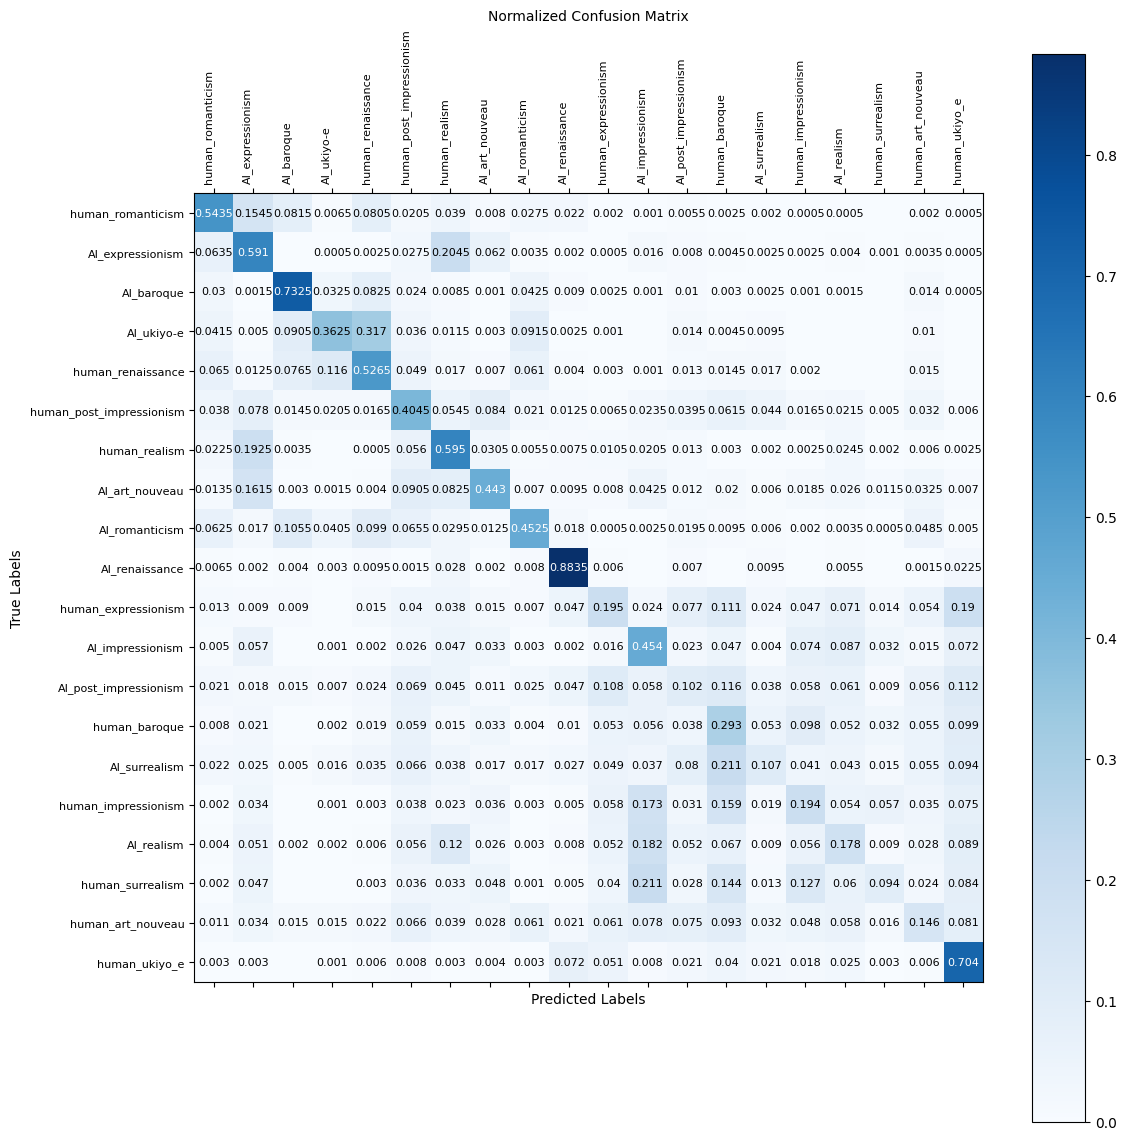


Classification Report:
                          precision    recall  f1-score   support

       human_romanticism       0.58      0.54      0.56      2000
        AI_expressionism       0.43      0.59      0.50      2000
              AI_baroque       0.65      0.73      0.69      2000
              AI_ukiyo-e       0.60      0.36      0.45      2000
       human_renaissance       0.44      0.53      0.48      2000
human_post_impressionism       0.40      0.40      0.40      2000
           human_realism       0.47      0.59      0.52      2000
          AI_art_nouveau       0.57      0.44      0.50      2000
          AI_romanticism       0.58      0.45      0.51      2000
          AI_renaissance       0.81      0.88      0.84      2000
     human_expressionism       0.26      0.20      0.22      1000
        AI_impressionism       0.30      0.45      0.36      1000
   AI_post_impressionism       0.13      0.10      0.11      1000
           human_baroque       0.19      0.29      

In [11]:
# Analyze test results
metrics = analyze_test_results(
    test_loss=test_loss,
    test_accuracy=test_accuracy,
    test_per_class_accuracy=test_per_class_accuracy,
    all_labels=all_labels,
    all_predictions=all_predictions,
    classes=test_classes
)